# Time Series Forecasting of Stock Market Data with ARIMA in Python
- Author: Sajjad Ali Shah

## Stock Market Data scraping in Python


In [5]:
# import libraris
# imporot libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import date,timedelta
import plotly.graph_objects as go
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX


In [6]:
date.today()

datetime.date(2024, 8, 2)

In [7]:
# define the dates to fetch data
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
print("Your data will be between these dates: ", start_date, end_date)

Your data will be between these dates:  2023-08-03 2024-08-02


In [8]:
# define the ticker
ticker="GOOGL"
df=yf.download(ticker,start=start_date,end=end_date,progress=False)

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-03,127.970001,129.389999,127.419998,128.449997,128.302750,20089500
2023-08-04,129.279999,131.509995,127.910004,128.110001,127.963135,26130000
2023-08-07,129.160004,131.610001,129.020004,131.529999,131.379211,22746300
2023-08-08,130.619995,131.509995,129.539993,131.399994,131.249359,23535200
2023-08-09,131.660004,132.039993,129.000000,129.660004,129.511368,24912900


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-08-03 to 2024-08-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [11]:
df.insert(0, "Date", df.index, True)
# df["Date"] = df.index
df.reset_index(drop=True, inplace=True)

In [12]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-08-03,127.970001,129.389999,127.419998,128.449997,128.302750,20089500
1,2023-08-04,129.279999,131.509995,127.910004,128.110001,127.963135,26130000
2,2023-08-07,129.160004,131.610001,129.020004,131.529999,131.379211,22746300
3,2023-08-08,130.619995,131.509995,129.539993,131.399994,131.249359,23535200
4,2023-08-09,131.660004,132.039993,129.000000,129.660004,129.511368,24912900


In [13]:
# make a plot on plotly
fig = px.line(df, x='Date', y=df.columns, title='Stock Price')
fig.show()

In [16]:
# select columns
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,2023-08-03,128.449997
1,2023-08-04,128.110001
2,2023-08-07,131.529999
3,2023-08-08,131.399994
4,2023-08-09,129.660004


In [18]:
# plot the data to see how it looks like using plotly
fig = px.line(df, x='Date', y='Close', title='Google Stock Price')
fig.show()

In [26]:
# stationarity check on data
from statsmodels.tsa.stattools import adfuller
def adf_test(df):
    result = adfuller(df)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data is stationary")
    else:
        print("Fail to reject the null hypothesis. Data is not stationary")

adf_test(df['Close'])

ADF Statistic: -1.079370
p-value: 0.723228
Fail to reject the null hypothesis. Data is not stationary


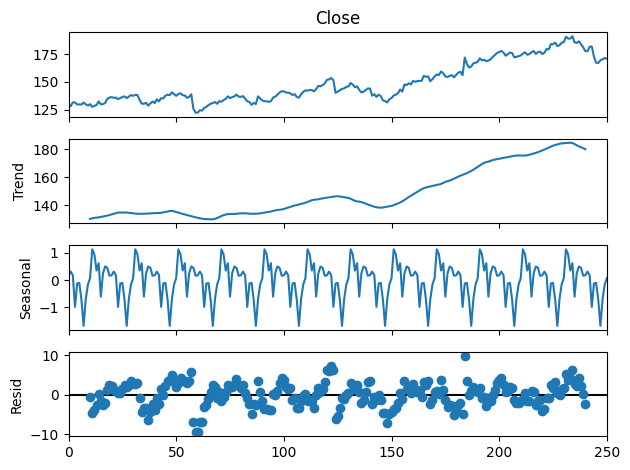

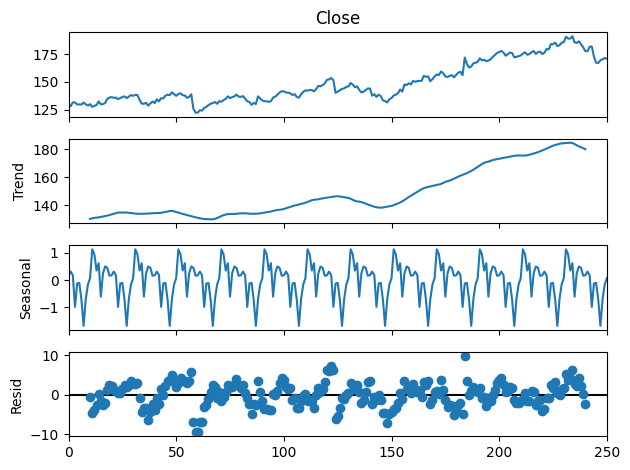

In [31]:
decompose=seasonal_decompose(df["Close"],model="additive",period=20)
decompose.plot()

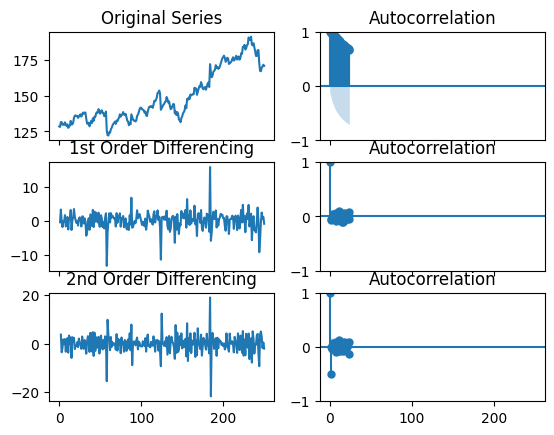

In [34]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df['Close']); axes[0, 0].set_title('Original Series')
plot_acf(df['Close'], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df['Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df['Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

# Lets find p 

In [36]:
# plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# pd.plotting.autocorrelation_plot(df['Close'])

# plot_acf(df['Close'], alpha=0.05)

from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['Close']))
print(x_acf)

           0
0   1.000000
1   0.984667
2   0.970199
3   0.957738
4   0.946283
5   0.934217
6   0.922579
7   0.909481
8   0.893148
9   0.877862
10  0.863207
11  0.849310
12  0.831835
13  0.814608
14  0.797145
15  0.782274
16  0.768588
17  0.755413
18  0.741758
19  0.728237
20  0.715628
21  0.704589
22  0.692839
23  0.680234


# Lets find the q value


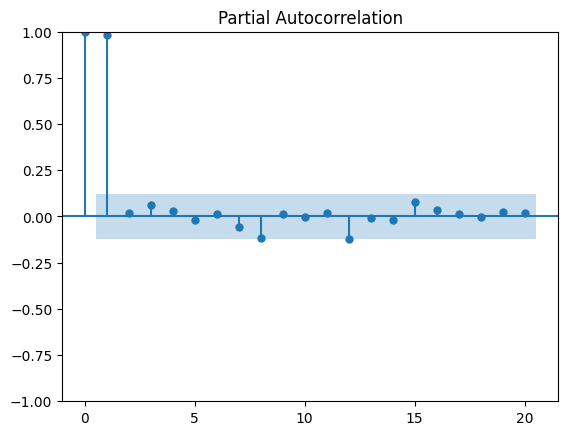

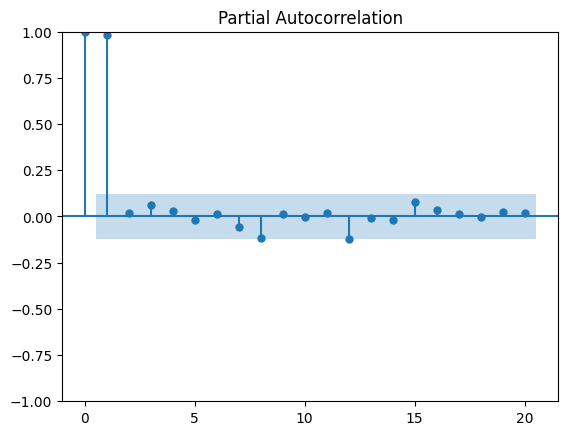

In [40]:
# partial autocorrelation
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['Close'], lags=20, alpha=0.05)

In [43]:
# lets run arima with pmdarima
from pmdarima.arima import auto_arima

model = auto_arima(df['Close'], start_p=1, start_q=1, max_p=2, max_q=2, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.75 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1303.796, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1218.831, Time=0.37 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.18 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1302.191, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1213.422, Time=0.51 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=4.88 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.90 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1212.776, Time=0.31 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=1218.431, Time=0.10 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=2.89 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=1213.258, Time=0.37 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=1214.466, Time=0.69 sec
 ARIMA(0,1,0)(2,1,0)[12] intercept   : AIC=1214.6

In [44]:
model=auto_arima(df["Close"],seasonal=True,suppress_warnings=True)

In [46]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -593.037
Date:                Fri, 02 Aug 2024   AIC                           1188.074
Time:                        16:35:25   BIC                           1191.596
Sample:                             0   HQIC                          1189.491
                                - 251                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.7290      0.258     26.088      0.000       6.223       7.234
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):               852.83
Prob(Q):                              0.32   Pr

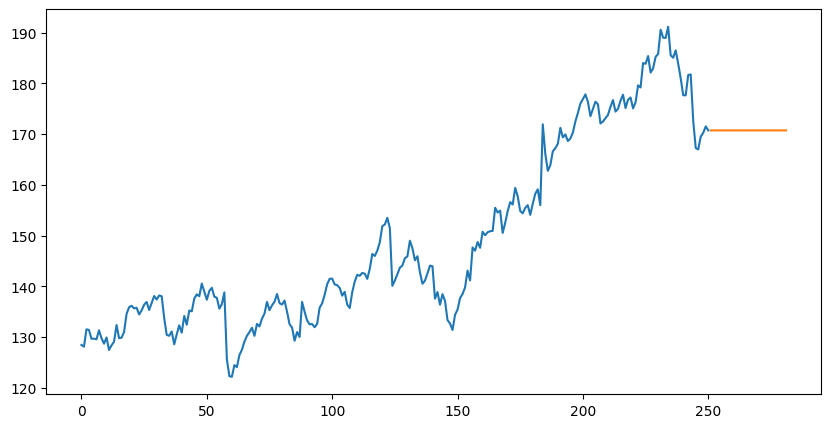

In [48]:
# stats model and arima
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 2, 1, 2

model = ARIMA(df['Close'], order=(p, d, q))
model = model.fit()
# print(model.summary())

# predict next 30 days
forecast = model.predict(len(df["Close"]), len(df['Close'])+30)
# print(forecast)

#plot forecast
plt.figure(figsize=(10, 5))
plt.plot(df['Close'], label='Actual')
plt.plot(forecast, label='Forecast')

In [49]:
# let's run SARIMA
import statsmodels.api as sm
import warnings

p , d, q = 2, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
print(model.summary())

c:\Users\Sajjad Khan\miniconda3\envs\MLD\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  251
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                -579.127
Date:                            Fri, 02 Aug 2024   AIC                           1176.254
Time:                                    16:40:05   BIC                           1207.505
Sample:                                         0   HQIC                          1188.849
                                            - 251                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0702      0.151      7.092      0.000       0.774       1.366
ar.L2         -0.8520      0.148   

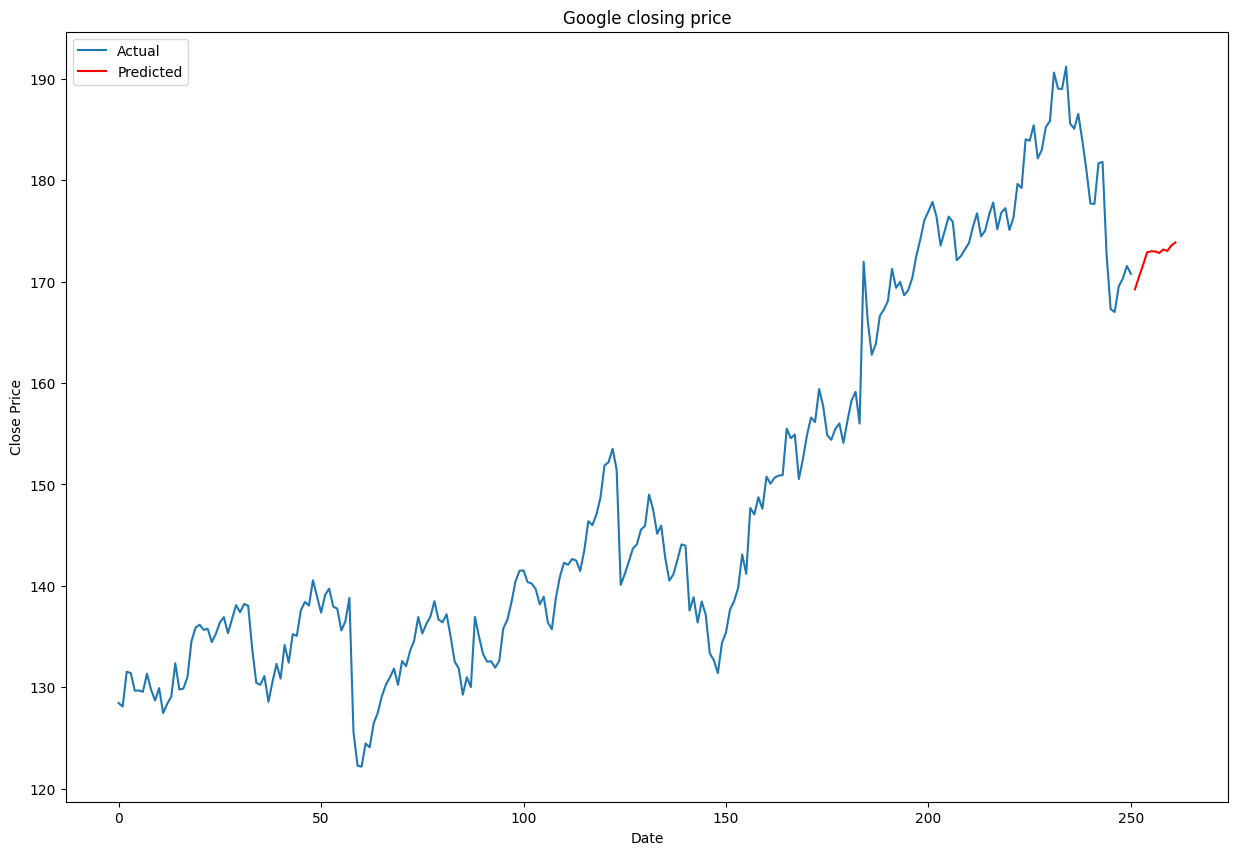

In [50]:
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()

c:\Users\Sajjad Khan\miniconda3\envs\MLD\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



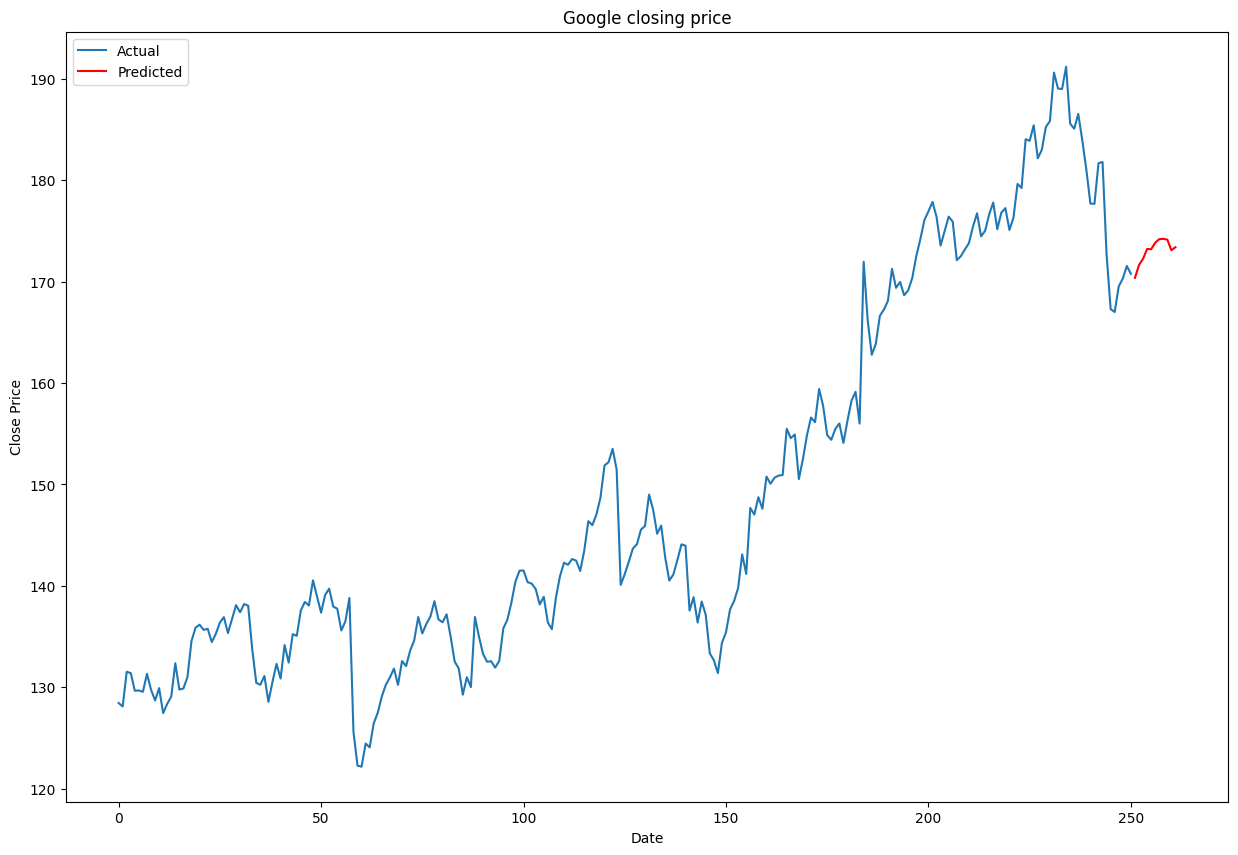

In [51]:
# lets update p, d, q
# let's run SARIMA
import statsmodels.api as sm
import warnings

p , d, q = 3, 1, 2

model = sm.tsa.statespace.SARIMAX(df['Close'], 
                                  order=(p, d, q), 
                                  seasonal_order=(p, d, q, 12))
model = model.fit()
predictions = model.predict(start=len(df['Close']), end=len(df['Close'])+10)

# plot the predictions
plt.figure(figsize=(15, 10))
plt.plot(df["Close"], label='Actual')
plt.plot(predictions, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Google closing price')
# change legend location
plt.legend(loc='upper left')
plt.show()
